In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:
# Сперва импортируем данные, нужные библиотеки и функции и выводим их на экран для анализа

In [3]:
data = pd.read_excel('Arvand.xlsx')
data

,KOD,Birthday,Year,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,...,"Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)",Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль
0,124017,1989-03-13 00:00:00,NaN,Оиладор,Мужской,Точик,Миёна,4,5,Хучанд,...,Категория 4,4670.0,5850.0,0.0,3,3,1,1,1000.0,1185.0
1,1046052,1963-02-12 00:00:00,NaN,Оиладор,Женский,Точик,Миёна,6,NaN,Хучанд,...,Категория 3,10219.0,10745.0,109.0,0,0,0,1,851.0,417.0
2,1046519,1969-01-12 00:00:00,1969.0,Оиладор,Мужской,Узбек,Миёна,4,1,Хучанд,...,Группа,2196.0,2600.0,404.0,0,0,0,9,500.0,820.0
3,1046692,1973-09-17 00:00:00,1973.0,Оиладор,Мужской,Узбек,Миёна,5,1,Хучанд,...,Группа,11176.0,11210.0,34.0,0,0,0,7,2100.0,1795.0
4,1046707,1973-03-31 00:00:00,1973.0,Оиладор,Мужской,Точик,Миёнаи махсус,4,5,Хучанд,...,Категория 1,64193.0,73637.0,7734.0,4,2,2,4,0.0,1710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,300003870,1963-01-12 00:00:00,NaN,Оиладор,Женский,Точик,Миёна,4,1,Панчакент,...,Категория 2,214.0,214.0,0.0,1,1,1,1,0.0,160.0
85418,300003871,1987-09-01 00:00:00,NaN,Оиладор,Мужской,Точик,Оли,6,2,Панчакент,...,Категория 2,1900.0,1900.0,0.0,9,5,2,1,0.0,359.0
85419,300003872,1976-03-10 00:00:00,NaN,Оиладор,Мужской,Узбек,Миёна,6,10,Панчакент,...,Категория 2,22950.0,22950.0,0.0,2,2,1,1,3900.0,1110.0
85420,300003873,1984-03-05 00:00:00,NaN,Оиладор,Мужской,Точик,Миёна,2,10,Панчакент,...,Категория 2,13765.0,14700.0,935.0,1,1,1,4,0.0,950.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 32 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                                           --------------  -----         
 0   KOD                                                                                                                                              85422 non-null  int64         
 1   Birthday                                                                                                                                         85241 non-null  object        
 2   Year                                                                                                                                             36221 non-null  f

In [5]:
## В модели было очень много пропусков и некоторые из них не получилось бы заполнить,
#поэтому я решил использовать эту функцию и полностью убрать из базы строчки в которых,
#хотябы в одной переменной есть пропуск, таким образом я также ускорил обучение и работу модели,
#так как данных теперь не 84 000, а 26 000
data = data.dropna()
data

,KOD,Birthday,Year,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,...,"Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)",Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль
2,1046519,1969-01-12 00:00:00,1969.0,Оиладор,Мужской,Узбек,Миёна,4,1,Хучанд,...,Группа,2196.0,2600.0,404.0,0,0,0,9,500.0,820.0
3,1046692,1973-09-17 00:00:00,1973.0,Оиладор,Мужской,Узбек,Миёна,5,1,Хучанд,...,Группа,11176.0,11210.0,34.0,0,0,0,7,2100.0,1795.0
4,1046707,1973-03-31 00:00:00,1973.0,Оиладор,Мужской,Точик,Миёнаи махсус,4,5,Хучанд,...,Категория 1,64193.0,73637.0,7734.0,4,2,2,4,0.0,1710.0
5,1046797,1969-02-23 00:00:00,1969.0,Оиладор,Мужской,Точик,Миёна,3,10,Хучанд,...,Категория 2,12128.0,16800.0,3016.0,0,0,0,4,2626.0,1656.0
7,1046805,1972-06-13 00:00:00,1972.0,Оиладор,Женский,Точик,Миёна,3,12,Хучанд,...,Группа,14668.0,15700.0,1032.0,0,0,0,15,1900.0,1220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,300003517,1961-04-15 00:00:00,1961.0,Бевамард (бевазан),Женский,Узбек,Миёна,5,5,Панчакент,...,Категория 2,6000.0,6000.0,0.0,1,1,1,3,0.0,690.0
85132,300003520,1951-05-20 00:00:00,1951.0,Бевамард (бевазан),Женский,Узбек,Миёна,4,18,Панчакент,...,Категория 2,5617.0,6100.0,483.0,0,0,0,4,0.0,550.0
85224,300003627,1968-01-02 00:00:00,1968.0,Оиладор,Женский,Точик,Миёнаи махсус,4,15,Панчакент,...,Категория 2,2800.0,2800.0,0.0,20,10,5,3,0.0,762.0
85234,300003640,1978-01-25 00:00:00,1978.0,Беоила,Женский,Точик,Оли,Нет инфо,7,Панчакент,...,Категория 2,700.0,700.0,0.0,20,5,7,4,0.0,678.0


In [6]:
## С помощью этого учатска кода мы создаём порок при котором клиент будет считать плохим или хорошим и указываем значение.

data['default_flg'] = data['Дни просрочки'] / data['Количество просрочек']
data['default_flg'] = data['default_flg'].apply(lambda x: 0 if x < 25 else 1)
data

C:\Users\user\AppData\Local\Temp\ipykernel_4452\2572127186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['default_flg'] = data['Дни просрочки'] / data['Количество просрочек']
C:\Users\user\AppData\Local\Temp\ipykernel_4452\2572127186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['default_flg'] = data['default_flg'].apply(lambda x: 0 if x < 25 else 1)


,KOD,Birthday,Year,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,...,Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,default_flg
2,1046519,1969-01-12 00:00:00,1969.0,Оиладор,Мужской,Узбек,Миёна,4,1,Хучанд,...,2196.0,2600.0,404.0,0,0,0,9,500.0,820.0,1
3,1046692,1973-09-17 00:00:00,1973.0,Оиладор,Мужской,Узбек,Миёна,5,1,Хучанд,...,11176.0,11210.0,34.0,0,0,0,7,2100.0,1795.0,1
4,1046707,1973-03-31 00:00:00,1973.0,Оиладор,Мужской,Точик,Миёнаи махсус,4,5,Хучанд,...,64193.0,73637.0,7734.0,4,2,2,4,0.0,1710.0,0
5,1046797,1969-02-23 00:00:00,1969.0,Оиладор,Мужской,Точик,Миёна,3,10,Хучанд,...,12128.0,16800.0,3016.0,0,0,0,4,2626.0,1656.0,1
7,1046805,1972-06-13 00:00:00,1972.0,Оиладор,Женский,Точик,Миёна,3,12,Хучанд,...,14668.0,15700.0,1032.0,0,0,0,15,1900.0,1220.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,300003517,1961-04-15 00:00:00,1961.0,Бевамард (бевазан),Женский,Узбек,Миёна,5,5,Панчакент,...,6000.0,6000.0,0.0,1,1,1,3,0.0,690.0,0
85132,300003520,1951-05-20 00:00:00,1951.0,Бевамард (бевазан),Женский,Узбек,Миёна,4,18,Панчакент,...,5617.0,6100.0,483.0,0,0,0,4,0.0,550.0,1
85224,300003627,1968-01-02 00:00:00,1968.0,Оиладор,Женский,Точик,Миёнаи махсус,4,15,Панчакент,...,2800.0,2800.0,0.0,20,10,5,3,0.0,762.0,0
85234,300003640,1978-01-25 00:00:00,1978.0,Беоила,Женский,Точик,Оли,Нет инфо,7,Панчакент,...,700.0,700.0,0.0,20,5,7,4,0.0,678.0,0


# 
ДАЛЬШЕ МЫ БУДЕМ ПРЕОБРАЗОВЫВАТЬ КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ В ФИКТИВНЫЕ



In [7]:
gender_map={'Мужской':1, 'Женский':0}
data['isMale']=data['Gender'].map(gender_map)
data = data.drop(['Gender'], axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_4452\2026281142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['isMale']=data['Gender'].map(gender_map)


In [8]:
map1={'Оиладор':1, 'Беоила':2, 'Бевамард (бевазан)':3, 'Чудошуда':4}
data['family_condition(1 - Оиладор; 2 - Беоила; 3 - Бевамард ; 4 - Чудошуда)']=data['Married'].map(map1)
data = data.drop(['Married'], axis = 1)

In [9]:
map2={'Миёна':1, 'Оли':5, 'Миёнаи махсус':2, 'Олии нопурра':4, 'Миёнаи нопурра' : 3}
data['Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи махсус ; 4 - Олии нопура; 3 - миёнаи нопурра)']=data['Educ'].map(map2)
data = data.drop(['Educ'], axis = 1)

In [10]:
map3={'Ч. Расулов':1, 'Хучанд':2, 'Истаравшан':3, 'Исфара':4, 'Душанбе' : 5, 'Панчакент' : 6}
data['Filial_code(2 - Хучанд ; 5 - Душанбе)']=data['Filial'].map(map3)
data = data.drop(['Filial'], axis = 1)

In [11]:
map4={'Хамкори':1, 'Шарик':2, 'VIP':3, 'Бовари':4}
data['level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари)']=data['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)'].map(map4)
data = data.drop(['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)'], axis = 1)

In [12]:
map5={'Кредит на предпринимательскую деятельность':2, 'Потребительский кредит':1, 'Энергосберегающие технологии':3, 'Жилищный кредит':4}
data['typeofcredit(1- Потребительский ;  2 - Предпринимательский; 3 - Энер.Технологии; 4 - Ипотека)']=data['Продукт'].map(map5)
data = data.drop(['Продукт'], axis = 1)

In [13]:
#для Nationality
data.loc[data['Nationality'] == 'Другие', 'Nationality_code'] = 0
data.loc[data['Nationality'] == 'Точик', 'Nationality_code'] = 1
data.loc[data['Nationality'] == 'Узбек', 'Nationality_code'] = 2
data.loc[data['Nationality'] == 'Тотор', 'Nationality_code'] = 3
data.loc[data['Nationality'] == 'Рус', 'Nationality_code'] = 4
data.loc[data['Nationality'] == 'Киргиз', 'Nationality_code'] = 5
data.loc[data['Nationality'] == 'Украин', 'Nationality_code'] = 6
data.loc[data['Nationality'] == 'Карис', 'Nationality_code'] = 7
data.loc[data['Nationality'] == 'Карачои', 'Nationality_code'] = 8

In [14]:
data['Направление_деятельности'], _ = pd.factorize(data['Навпреление деятельности'])

In [15]:
data['Region_code'], _ = pd.factorize(data['Region'])

In [16]:
data['Sector'], _ = pd.factorize(data['Сектор'])

In [17]:
data["year_of_credit"] = data["Дата выдачи"].dt.year
data = data.drop(['Дата выдачи'] , axis = 1)

# Здесь мы будем переобразовывать значение переменной "Сумма кредита" в одну валюту в соотвествии с выбранной валютой и годом

In [18]:
ar1 = data['Сумма кредита'].to_numpy()
ar2 = data['Валюта кредита'].to_numpy()
ar3 = data['year_of_credit'].to_numpy()
ar4 = data['Ежемесячная сумма погашения по графику'].to_numpy()

In [19]:
for i in range(26589):
    if(ar2[i] == 'Доллар США'):
        if(ar3[i] == 2014):
            ar1[i] = ar1[i] * 4.7
            ar4[i] = ar4[i] * 4.7
        else:
            ar1[i] = ar1[i] * 5.3
            ar4[i] = ar4[i] * 5.3
    elif(ar2[i] == 'Рос.рубль'):
        if(ar3[i] == 2014):
            ar1[i] = ar1[i] * 0.09
            ar4[i] = ar4[i] * 0.09
        else:
            ar1[i] = ar1[i]* 0.1
            ar4[i] = ar4[i] * 0.1
print(ar1)

[ 4700. 12220. 94000. ...  4000.  2000.  2000.]


In [20]:
data['Сумма кредита'] = ar1
data['Ежемесячная сумма погашения по графику'] = ar4
data

,KOD,Birthday,Year,Nationality,FamilySize,BusExper,Region,Навпреление деятельности,Сектор,Валюта кредита,...,family_condition(1 - Оиладор; 2 - Беоила; 3 - Бевамард ; 4 - Чудошуда),Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи махсус ; 4 - Олии нопура; 3 - миёнаи нопурра),Filial_code(2 - Хучанд ; 5 - Душанбе),level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари),typeofcredit(1- Потребительский ; 2 - Предпринимательский; 3 - Энер.Технологии; 4 - Ипотека),Nationality_code,Направление_деятельности,Region_code,Sector,year_of_credit
2,1046519,1969-01-12 00:00:00,1969.0,Узбек,4,1,Худжанд-Панчшанбе,Чорводори ва коркарди шир,Животноводство,Доллар США,...,1,1,2,3,2,2.0,0,0,0,2014
3,1046692,1973-09-17 00:00:00,1973.0,Узбек,5,1,Худжанд-Центр,Чорводори ва коркарди шир,Животноводство,Доллар США,...,1,1,2,1,2,2.0,0,1,0,2014
4,1046707,1973-03-31 00:00:00,1973.0,Точик,4,5,Ифтихор,Чорводори ва коркарди шир,Животноводство,Доллар США,...,1,2,2,2,2,1.0,0,2,0,2014
5,1046797,1969-02-23 00:00:00,1969.0,Точик,3,10,Худжанд-Центр,Савдо,Торговля,Доллар США,...,1,1,2,1,2,1.0,1,1,1,2014
7,1046805,1972-06-13 00:00:00,1972.0,Точик,3,12,Худжанд-Центр,Савдо,Торговля,Сомони,...,1,1,2,2,2,1.0,1,1,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,300003517,1961-04-15 00:00:00,1961.0,Узбек,5,5,Панчакент,Приобретение мебели,Потребнужды,Сомони,...,3,1,6,1,1,2.0,6,48,2,2015
85132,300003520,1951-05-20 00:00:00,1951.0,Узбек,4,18,Панчакент,Чорводори ва коркарди шир,Животноводство,Сомони,...,3,1,6,1,2,2.0,0,48,0,2015
85224,300003627,1968-01-02 00:00:00,1968.0,Точик,4,15,Панчакент,Ремонт дома,Потребнужды,Сомони,...,1,2,6,1,1,1.0,2,48,2,2015
85234,300003640,1978-01-25 00:00:00,1978.0,Точик,Нет инфо,7,Панчакент,Приобретение техники,Потребнужды,Сомони,...,2,5,6,1,1,1.0,4,48,2,2015


# Так как мы конвертировали переменные , нам нужно удалить эти переменные и те которые не нужно для обучения модели.


In [21]:
data = data.drop(['KOD'], axis = 1)

In [22]:
data = data.drop(['Birthday'], axis = 1)

In [23]:
data = data.drop(['Region', 'Сектор', 'Nationality'], axis = 1)

In [24]:
data["finish_date"] = data["Дата окончания по графику"].dt.year
data = data.drop(['Дата окончания по графику'] , axis = 1)

In [25]:
data = data.drop(['Валюта кредита'], axis = 1)

In [26]:
data = data.drop(['Актив', 'Капитал'], axis = 1)

In [27]:
data = data.drop(['Filial_code(2 - Хучанд ; 5 - Душанбе)', 'Sector'], axis = 1)

In [28]:
data = data.drop(['Валовая прибыль'], axis = 1)

In [29]:
data

,Year,FamilySize,BusExper,Навпреление деятельности,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),"Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)",Обязательства,...,isMale,family_condition(1 - Оиладор; 2 - Беоила; 3 - Бевамард ; 4 - Чудошуда),Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи махсус ; 4 - Олии нопура; 3 - миёнаи нопурра),level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари),typeofcredit(1- Потребительский ; 2 - Предпринимательский; 3 - Энер.Технологии; 4 - Ипотека),Nationality_code,Направление_деятельности,Region_code,year_of_credit,finish_date
2,1969.0,4,1,Чорводори ва коркарди шир,4700.0,10,1630.9,7.0,Группа,404.0,...,1,1,1,3,2,2.0,0,0,2014,2014
3,1973.0,5,1,Чорводори ва коркарди шир,12220.0,8,4262.9,5.0,Группа,34.0,...,1,1,1,1,2,2.0,0,1,2014,2014
4,1973.0,4,5,Чорводори ва коркарди шир,94000.0,24,5856.2,4.0,Категория 1,7734.0,...,1,1,2,2,2,1.0,0,2,2014,2016
5,1969.0,3,10,Савдо,23500.0,18,1607.4,0.0,Категория 2,3016.0,...,1,1,1,1,2,1.0,1,1,2014,2015
7,1972.0,3,12,Савдо,1000.0,1,1029.9,0.0,Группа,1032.0,...,0,1,1,2,2,1.0,1,1,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,1961.0,5,5,Приобретение мебели,1500.0,18,117.0,0.0,Категория 2,0.0,...,0,3,1,1,1,2.0,6,48,2015,2017
85132,1951.0,4,18,Чорводори ва коркарди шир,1500.0,12,155.0,0.0,Категория 2,483.0,...,0,3,1,1,2,2.0,0,48,2015,2016
85224,1968.0,4,15,Ремонт дома,4000.0,12,454.0,1.0,Категория 2,0.0,...,0,1,2,1,1,1.0,2,48,2015,2016
85234,1978.0,Нет инфо,7,Приобретение техники,2000.0,12,212.0,0.0,Категория 2,0.0,...,0,2,5,1,1,1.0,4,48,2015,2016


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26589 entries, 2 to 85239
Data columns (total 26 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Year                                                                                                                                             26589 non-null  float64
 1   FamilySize                                                                                                                                       26589 non-null  object 
 2   BusExper                                                                                                                                         26589 non-null  object 
 3   Навпреление деят

In [31]:
data = data.drop(['Льготный период (месяц)', 'Ежемесячная сумма погашения по графику'], axis = 1)
data

,Year,FamilySize,BusExper,Навпреление деятельности,Сумма кредита,Срок кредита,"Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)",Обязательства,Дни просрочки,Максимальные дни просрочки,...,isMale,family_condition(1 - Оиладор; 2 - Беоила; 3 - Бевамард ; 4 - Чудошуда),Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи махсус ; 4 - Олии нопура; 3 - миёнаи нопурра),level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари),typeofcredit(1- Потребительский ; 2 - Предпринимательский; 3 - Энер.Технологии; 4 - Ипотека),Nationality_code,Направление_деятельности,Region_code,year_of_credit,finish_date
2,1969.0,4,1,Чорводори ва коркарди шир,4700.0,10,Группа,404.0,0,0,...,1,1,1,3,2,2.0,0,0,2014,2014
3,1973.0,5,1,Чорводори ва коркарди шир,12220.0,8,Группа,34.0,0,0,...,1,1,1,1,2,2.0,0,1,2014,2014
4,1973.0,4,5,Чорводори ва коркарди шир,94000.0,24,Категория 1,7734.0,4,2,...,1,1,2,2,2,1.0,0,2,2014,2016
5,1969.0,3,10,Савдо,23500.0,18,Категория 2,3016.0,0,0,...,1,1,1,1,2,1.0,1,1,2014,2015
7,1972.0,3,12,Савдо,1000.0,1,Группа,1032.0,0,0,...,0,1,1,2,2,1.0,1,1,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,1961.0,5,5,Приобретение мебели,1500.0,18,Категория 2,0.0,1,1,...,0,3,1,1,1,2.0,6,48,2015,2017
85132,1951.0,4,18,Чорводори ва коркарди шир,1500.0,12,Категория 2,483.0,0,0,...,0,3,1,1,2,2.0,0,48,2015,2016
85224,1968.0,4,15,Ремонт дома,4000.0,12,Категория 2,0.0,20,10,...,0,1,2,1,1,1.0,2,48,2015,2016
85234,1978.0,Нет инфо,7,Приобретение техники,2000.0,12,Категория 2,0.0,20,5,...,0,2,5,1,1,1.0,4,48,2015,2016


In [32]:
data.loc[data['FamilySize'] == 'Нет инфо', 'FamilySize'] = 0

In [33]:
data.loc[data['BusExper'] == '6-мох', 'BusExper'] = 6
data.loc[data['BusExper'] == '4-мох', 'BusExper'] = 4
data.loc[data['BusExper'] == '20+', 'BusExper'] = 21

In [34]:
data = data.drop(['Навпреление деятельности'], axis = 1)

In [35]:
data['Year'] = data['Year'].astype('int')
data['Age'] = ((data['year_of_credit'] - data['Year']))
data = data.drop(['Year', 'year_of_credit'], axis = 1)

In [36]:
data['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].value_counts()
map6={'Группа': 2, 'Категория 3':2, 'Категория 2':3, 'Категория 4':1, 'Категория 1' : 4}
data['Zalog(1 - Без залога, 2 - Поручитель, 3 - движеме имушество, 4 - недвижимое имущество)']=data['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].map(map6)
data = data.drop(['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'], axis = 1)

In [37]:
data = data.drop(['finish_date'], axis = 1)

In [38]:
data = data.drop(['Количество просрочек'], axis = 1)

In [39]:
data = data.drop(['Направление_деятельности', 'Region_code'], axis = 1)

In [40]:
data2 = data

In [41]:
data2 = data2.drop(['Максимальные дни просрочки' , 'default_flg'], axis = 1)
data2

,FamilySize,BusExper,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Этап кредитования (который раз получает кредит,Чистая прибыль,isMale,family_condition(1 - Оиладор; 2 - Беоила; 3 - Бевамард ; 4 - Чудошуда),Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи махсус ; 4 - Олии нопура; 3 - миёнаи нопурра),level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари),typeofcredit(1- Потребительский ; 2 - Предпринимательский; 3 - Энер.Технологии; 4 - Ипотека),Nationality_code,Age,"Zalog(1 - Без залога, 2 - Поручитель, 3 - движеме имушество, 4 - недвижимое имущество)"
2,4,1,4700.0,10,404.0,0,9,820.0,1,1,1,3,2,2.0,45,2
3,5,1,12220.0,8,34.0,0,7,1795.0,1,1,1,1,2,2.0,41,2
4,4,5,94000.0,24,7734.0,4,4,1710.0,1,1,2,2,2,1.0,41,4
5,3,10,23500.0,18,3016.0,0,4,1656.0,1,1,1,1,2,1.0,45,3
7,3,12,1000.0,1,1032.0,0,15,1220.0,0,1,1,2,2,1.0,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,5,5,1500.0,18,0.0,1,3,690.0,0,3,1,1,1,2.0,54,3
85132,4,18,1500.0,12,483.0,0,4,550.0,0,3,1,1,2,2.0,64,3
85224,4,15,4000.0,12,0.0,20,3,762.0,0,1,2,1,1,1.0,47,3
85234,0,7,2000.0,12,0.0,20,4,678.0,0,2,5,1,1,1.0,37,3


In [42]:
data2['FamilySize'] = data2['FamilySize'].astype(int)
data2['BusExper'] = data2['BusExper'].astype(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26589 entries, 2 to 85239
Data columns (total 16 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   FamilySize                                                                                     26589 non-null  int32  
 1   BusExper                                                                                       26589 non-null  int32  
 2   Сумма кредита                                                                                  26589 non-null  float64
 3   Срок кредита                                                                                   26589 non-null  int64  
 4   Обязательства                                                                                  26589 non-null  float64
 5   Дни просрочки     

In [43]:
data = data.drop(['Дни просрочки', 'Максимальные дни просрочки'], axis = 1)

In [44]:
data

,FamilySize,BusExper,Сумма кредита,Срок кредита,Обязательства,Этап кредитования (который раз получает кредит,Чистая прибыль,default_flg,isMale,family_condition(1 - Оиладор; 2 - Беоила; 3 - Бевамард ; 4 - Чудошуда),Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи махсус ; 4 - Олии нопура; 3 - миёнаи нопурра),level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари),typeofcredit(1- Потребительский ; 2 - Предпринимательский; 3 - Энер.Технологии; 4 - Ипотека),Nationality_code,Age,"Zalog(1 - Без залога, 2 - Поручитель, 3 - движеме имушество, 4 - недвижимое имущество)"
2,4,1,4700.0,10,404.0,9,820.0,1,1,1,1,3,2,2.0,45,2
3,5,1,12220.0,8,34.0,7,1795.0,1,1,1,1,1,2,2.0,41,2
4,4,5,94000.0,24,7734.0,4,1710.0,0,1,1,2,2,2,1.0,41,4
5,3,10,23500.0,18,3016.0,4,1656.0,1,1,1,1,1,2,1.0,45,3
7,3,12,1000.0,1,1032.0,15,1220.0,1,0,1,1,2,2,1.0,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,5,5,1500.0,18,0.0,3,690.0,0,0,3,1,1,1,2.0,54,3
85132,4,18,1500.0,12,483.0,4,550.0,1,0,3,1,1,2,2.0,64,3
85224,4,15,4000.0,12,0.0,3,762.0,0,0,1,2,1,1,1.0,47,3
85234,0,7,2000.0,12,0.0,4,678.0,0,0,2,5,1,1,1.0,37,3


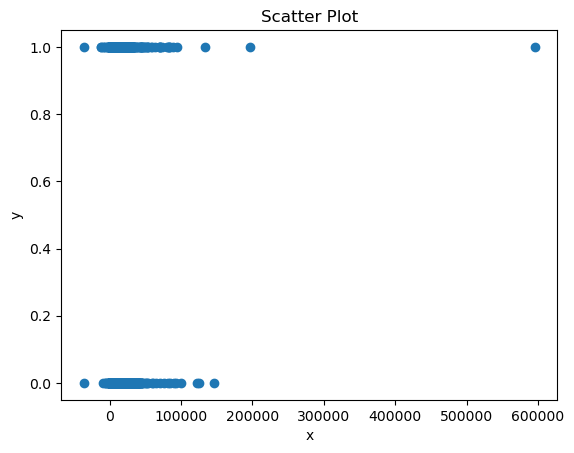

In [45]:
import matplotlib.pyplot as plt
x = data['Чистая прибыль']
y = data['default_flg']
plt.plot(x, y, "o")

# Добавляем заголовок
plt.title("Scatter Plot")

# Добавляем оси
plt.xlabel("x")
plt.ylabel("y")

# Показываем график
plt.show()

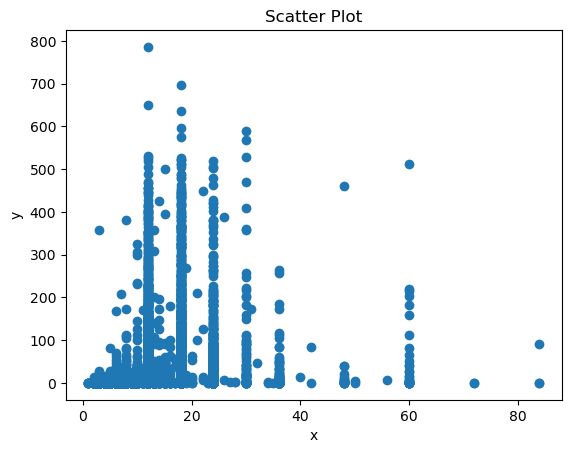

In [46]:
x = data2['Срок кредита']
y = data2['Дни просрочки']
plt.plot(x, y, "o")

# Добавляем заголовок
plt.title("Scatter Plot")

# Добавляем оси
plt.xlabel("x")
plt.ylabel("y")

# Показываем график
plt.show()

In [47]:
data = data.drop(['Nationality_code'], axis = 1)
data2 = data2.drop(['Nationality_code'], axis = 1)

In [48]:
features = data.drop(['default_flg'], axis=1)
target = data['default_flg']
# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=190)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Смотрим какие переменные важны для столбца 'Дни просрочки'


# Создаем модель случайного леса
rf_model = RandomForestClassifier(random_state=42)

# Обучаем модель на обучающем наборе данных
rf_model.fit(X_train, y_train)

# Получаем важность признаков
feature_importances = rf_model.feature_importances_

# Создаем DataFrame для отображения важности признаков
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Сортируем по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Выводим результаты
print(feature_importance_df)

                                              Feature  Importance
6                                      Чистая прибыль    0.170311
12                                                Age    0.132938
2                                       Сумма кредита    0.125556
1                                            BusExper    0.100399
5      Этап кредитования (который раз получает кредит    0.086445
4                                       Обязательства    0.079656
3                                        Срок кредита    0.072999
0                                          FamilySize    0.069918
10  level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари)    0.037202
9   Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи мах...    0.031651
13  Zalog(1 - Без залога, 2 - Поручитель, 3 - движ...    0.027483
7                                              isMale    0.024328
11  typeofcredit(1- Потребительский ;  2 - Предпри...    0.022607
8   family_condition(1 - Оиладор; 2 - Беоила; 3 - ...    0.018508


# Далее мы пробуем различные модели классификации для того что определить хороший клиент или нет и обучить модель

In [50]:
# from sklearn.tree import DecisionTreeClassifier

# # Инициализация модели дерева решений
# DecTree_model = DecisionTreeClassifier()
# X = data.drop("default_flg", axis=1)
# y = data["default_flg"]

# # Разделение данных на тренировочный и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Обучение модели на тренировочных данных
# DecTree_model.fit(X_train, y_train)

# # Предсказание на тестовых данных
# y_pred = DecTree_model.predict(X_test)

# # Оценка качества модели
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Вывод результатов
# auc = roc_auc_score(y_test, y_pred)

# print(auc)
# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')

In [51]:
# # Импорт необходимых библиотек

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Инициализация модели логистической регрессии
# lr_model = LogisticRegression()

# # Обучение модели на тренировочных данных
# lr_model.fit(X_train, y_train)

# # Предсказание на тестовых данных
# y_pred = lr_model.predict(X_test)

# # Оценка качества модели
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)

# print(auc)
# # Вывод результатов
# print(f'Accuracy: {accuracy}')

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
features = data.drop(['default_flg'], axis=1)
target = data['default_flg']
# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)


#Мы запустили цикл и нашли самые лучшие парметры для обучения модели, я закоментировал этот код т.к на его работу нужно очень много времени



# param_grid_gb = {
#     'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
#     'max_depth': [6, 7, 8, 9,10, 11, 12, 13, 14],
# }
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# randf_model = RandomForestClassifier()

# grid_search_gb = GridSearchCV(randf_model, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# grid_search_gb.fit(X_train, y_train)

# best_model = grid_search_gb.best_estimator_

# y_pred = best_model.predict(X_test)
# print("Лучшие параметры для Random Forest:", grid_search_gb.best_params_)

randf_model = RandomForestClassifier(n_estimators=350, max_depth = 11)
randf_model.fit(X_train, y_train)
y_pred = randf_model.predict(X_test)
# Получаем вероятности возврата кредита

In [53]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# # Вывод результатов
auc = roc_auc_score(y_test, y_pred)

print(f'AUC: {auc}')
print(f'Accuracy: {accuracy}')

AUC: 0.6007379750876023
Accuracy: 0.6216622790522753


In [54]:
data2['default_flg'] = data['default_flg']

# Здесь будем создавать модель для прогназирования количества дней просрочки, т.е сколько дней человек просрочит

In [55]:
# from sklearn.ensemble import RandomForestRegressor
# X = data2.drop(['Дни просрочки'], axis = 1)
# y = data2['Дни просрочки']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20)
# model_for_predicting_days = RandomForestRegressor(n_estimators = 300, max_depth = 13)
# model_for_predicting_days.fit(X_train2, y_train2)
# y_pred2 = model.predict(X_test2)

In [56]:
# Проверяем несколько моделей и находим самый лучший по показателям Accuracy and AUC
from sklearn.tree import DecisionTreeRegressor
X = data2.drop(['Дни просрочки'], axis = 1)
y = data2['Дни просрочки']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20)
model_for_days = DecisionTreeRegressor(max_depth = 14)
model_for_days.fit(X_train2, y_train2)
y_pred2 = model_for_days.predict(X_test2)
y_pred2 = y_pred2.astype(int)

In [57]:
from sklearn.metrics import roc_auc_score
accuracy2 = accuracy_score(y_test2, y_pred2)
print(accuracy2)

0.46991350131628434


In [63]:
fam_size = 5 
bus_exp = 18
creditsum = 5000
period = 12
otherdebts = 0
numberofcredits = 1 
income = 10000
gender = 0
family = 1
edu = 2
level = 1
typeofcredit = 1
age = 36
zalog = 4
check_model = [[fam_size, bus_exp, creditsum, period, otherdebts, numberofcredits, income, gender, family, edu, level, typeofcredit, age, zalog]]
prediction = randf_model.predict(check_model)
check_model2 = [[fam_size, bus_exp, creditsum, period, otherdebts, numberofcredits, income, gender, family, edu, level, typeofcredit, age, zalog, prediction[0]]]
predicting_days = model_for_days.predict(check_model2)
if(prediction[0] == 1):
    print('Этот клиент подхоит под требования и ему может быть выдан кредит')
    print('В случае кредита этот кредит вернёт кредит с вероятностью ', int(randf_model.predict_proba(check_model)[:, 1] * 100))
else:
    print('Этот клиент не подхоит под требования и ему не может быть выдан кредит')
    print('В случае кредита этот кредит вернёт кредит только с вероятностью ', int(randf_model.predict_proba(check_model)[:, 1] * 100))
    print("Этот клиент просрочит кредит на ", int(predicting_days[0]))
# print(prediction)
# print(randf_model.predict_proba(check_model)[:, 1])
# print(int(predicting_days[0]))

Этот клиент подхоит под требования и ему может быть выдан кредит
В случае кредита этот кредит вернёт кредит с вероятностью  51


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
import pickle
pickle_out = open("Arvand.pkl","wb")
pickle.dump(randf_model, pickle_out)
pickle_out.close()

In [64]:
data

,FamilySize,BusExper,Сумма кредита,Срок кредита,Обязательства,Этап кредитования (который раз получает кредит,Чистая прибыль,default_flg,isMale,family_condition(1 - Оиладор; 2 - Беоила; 3 - Бевамард ; 4 - Чудошуда),Education(1 - Миёна ; 5 - Оли ; 2 - Миёнаи махсус ; 4 - Олии нопура; 3 - миёнаи нопурра),level(1-Хамкори ; 2 - Шарик; 3 - ВИП; 4 - Бовари),typeofcredit(1- Потребительский ; 2 - Предпринимательский; 3 - Энер.Технологии; 4 - Ипотека),Age,"Zalog(1 - Без залога, 2 - Поручитель, 3 - движеме имушество, 4 - недвижимое имущество)"
2,4,1,4700.0,10,404.0,9,820.0,1,1,1,1,3,2,45,2
3,5,1,12220.0,8,34.0,7,1795.0,1,1,1,1,1,2,41,2
4,4,5,94000.0,24,7734.0,4,1710.0,0,1,1,2,2,2,41,4
5,3,10,23500.0,18,3016.0,4,1656.0,1,1,1,1,1,2,45,3
7,3,12,1000.0,1,1032.0,15,1220.0,1,0,1,1,2,2,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85129,5,5,1500.0,18,0.0,3,690.0,0,0,3,1,1,1,54,3
85132,4,18,1500.0,12,483.0,4,550.0,1,0,3,1,1,2,64,3
85224,4,15,4000.0,12,0.0,3,762.0,0,0,1,2,1,1,47,3
85234,0,7,2000.0,12,0.0,4,678.0,0,0,2,5,1,1,37,3
